# Feature Selection

### Imports

In [1]:
import os
import sys
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname((os.path.abspath(""))))

In [2]:
from src.pipeline import Pipeline

[nltk_data] Downloading package punkt to /Users/tim/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/tim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/tim/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tim/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
pipeline = Pipeline(
    collection='data/processed/30_5000_1000_collection.pkl',
    queries='data/processed/30_5000_1000_queries.pkl',
    queries_val='data/processed/30_5000_1000_queries_val.pkl',
    queries_test='data/processed/30_5000_1000_queries_test.pkl',
    features='data/processed/30_5000_1000_features.pkl',
    qrels_val='data/processed/30_5000_1000_qrels_val.pkl',
    qrels_test='data/processed/30_5000_1000_qrels_test.pkl',
    features_test='data/processed/30_5000_1000_features_test.pkl',
    features_val='data/processed/30_5000_1000_features_val.pkl',
)

In [4]:
pipeline.features

,qID,pID,y,w2v_cosine,w2v_euclidean,w2v_manhattan,w2v_tfidf_cosine,w2v_tfidf_euclidean,w2v_tfidf_manhattan,tfidf_cosine,...,polarity_doc,subjectivity_query,polarity_query,bm25,doc_nouns,doc_adjectives,doc_verbs,query_nouns,query_adjectives,query_verbs
0,603195,7050012,1,0.972107,144.641830,1124.871630,0.938781,2.765727,22.236694,0.537439,...,0.000000,0.00,0.00,-24.655536,23,6,4,3,1,1
1,474183,325505,1,0.971866,131.960266,1033.670312,0.985675,1.360485,11.347487,0.745907,...,0.450000,0.00,0.00,-33.129796,18,9,3,4,0,0
2,320545,1751825,1,0.947701,94.900002,756.378183,0.959522,2.236971,17.352688,0.409509,...,0.500000,0.20,0.20,-16.699603,20,2,14,2,1,1
3,89798,5069949,1,0.972710,161.470459,1273.643564,0.933304,1.714253,13.493497,0.541627,...,0.066667,0.25,0.00,-27.678576,25,10,5,3,1,0
4,1054603,2869106,1,0.965680,155.648453,1216.564726,0.941391,1.799412,14.369308,0.438115,...,0.000000,0.00,0.00,-28.497519,20,9,6,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,128401,6127598,0,0.796978,85.670822,678.466760,0.555981,3.027138,24.841764,0.185056,...,-0.520833,0.00,0.00,-8.866170,16,6,13,2,1,0
4996,1044540,4616118,0,0.922095,157.044754,1238.354322,0.603788,2.167866,17.812756,0.140057,...,0.156250,0.00,0.00,-7.852468,25,9,16,0,0,1
4997,486146,1137390,0,0.946438,125.126984,972.330644,0.882998,4.161341,34.815641,0.314505,...,-0.100000,0.10,0.00,-15.909103,12,1,10,2,0,2
4998,532697,5161847,0,0.938939,99.808395,790.453814,0.893834,1.977307,16.122506,0.344173,...,0.284375,0.00,0.00,-16.617979,18,8,9,3,1,0


### Correlation Matrix
#### Pearson correlation

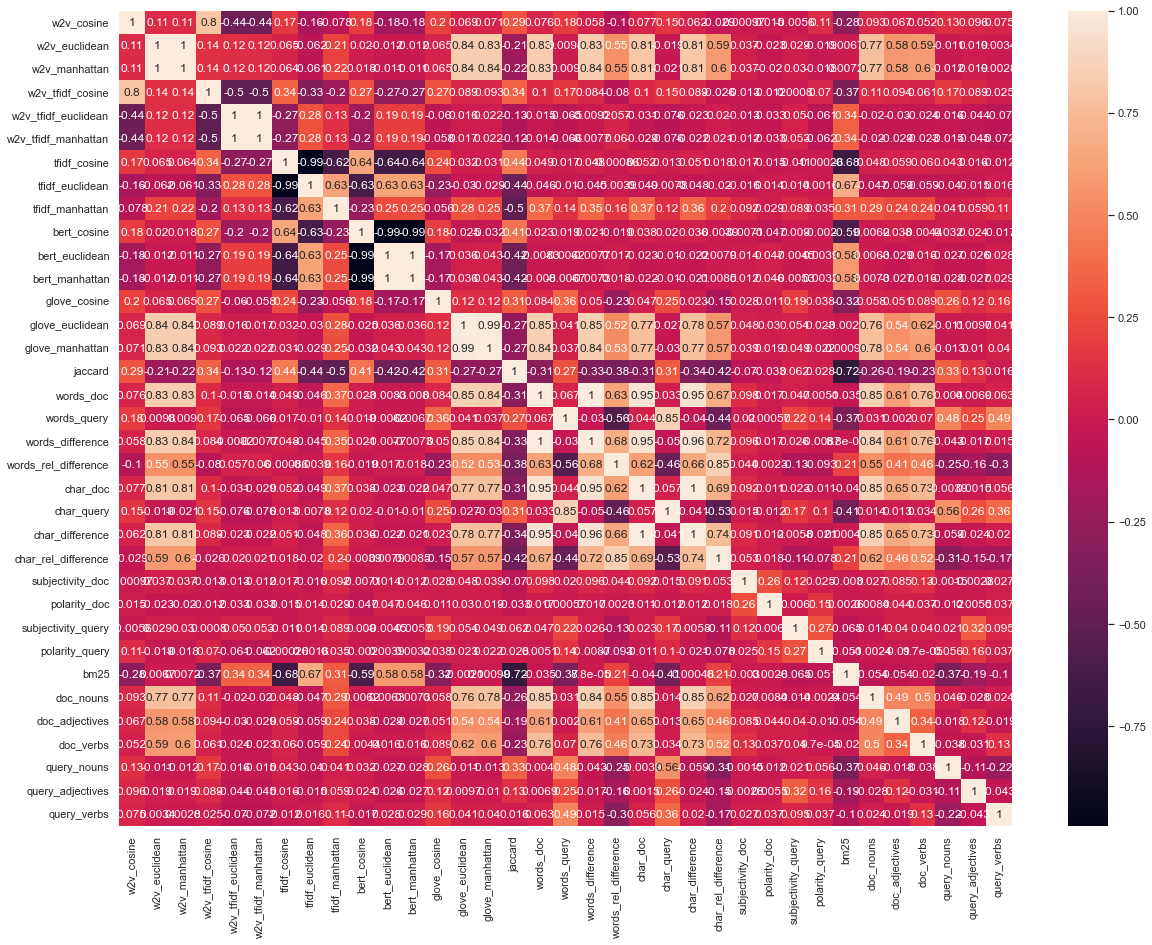

In [6]:
corr = pipeline.features.drop(columns=['qID', 'pID', 'y']).corr(method="pearson")
sn.set(rc = {'figure.figsize':(20,15)})
sn.heatmap(corr, annot=True)
plt.show()

#### Spearman correlation

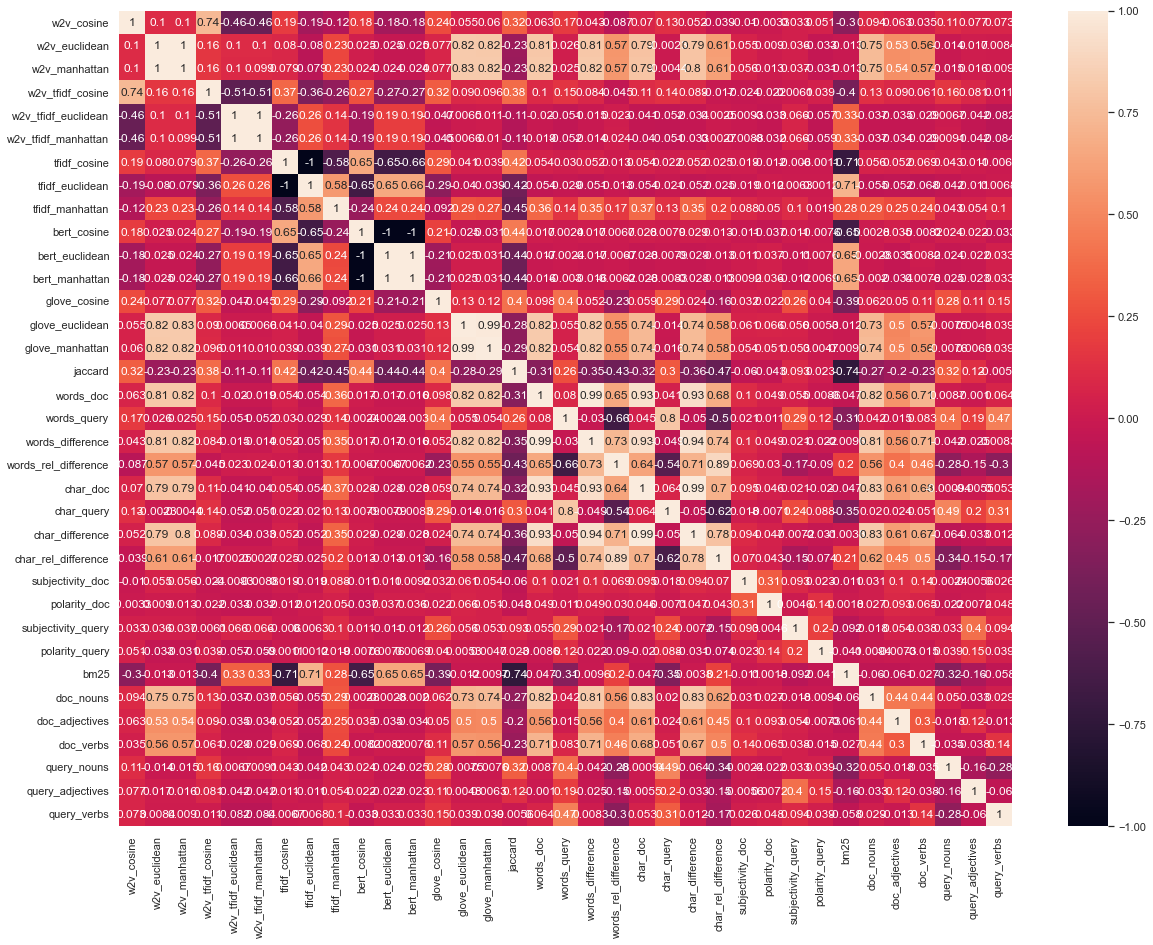

In [7]:
corr2 = pipeline.features.drop(columns=['qID', 'pID', 'y']).corr(method="spearman")
sn.set(rc = {'figure.figsize':(20,15)})
sn.heatmap(corr2, annot=True)
plt.show()

### Plots of the correlation to y
#### Pearson correlation

<AxesSubplot:>

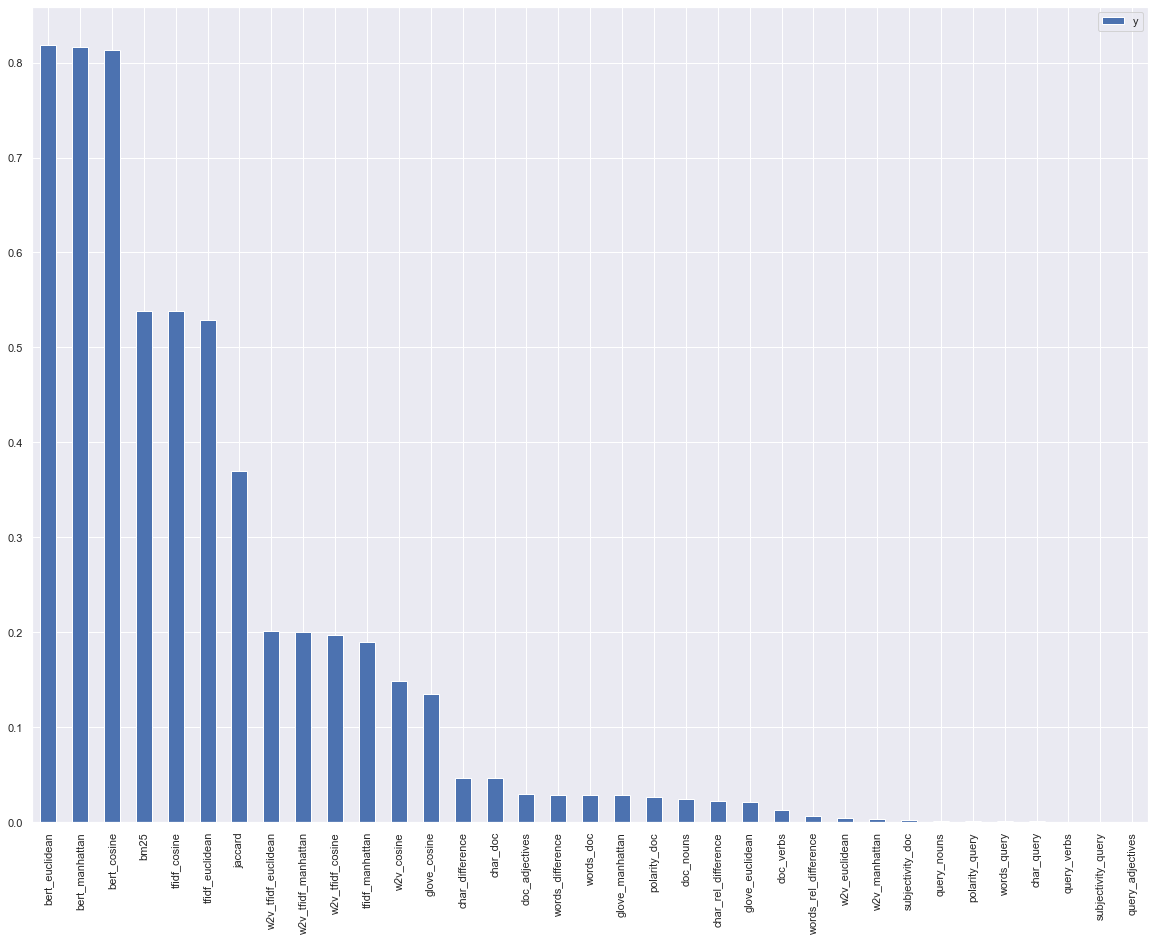

In [8]:
corr_y = abs(pipeline.features.drop(columns=['qID', 'pID']).corr(method="pearson")["y"])
highest_corr = pd.DataFrame(corr_y)
highest_corr.drop(['y'], inplace=True)
highest_corr.sort_values('y',  ascending=False, inplace=True)
highest_corr.plot(kind='bar')

#### Spearman correlation

<AxesSubplot:>

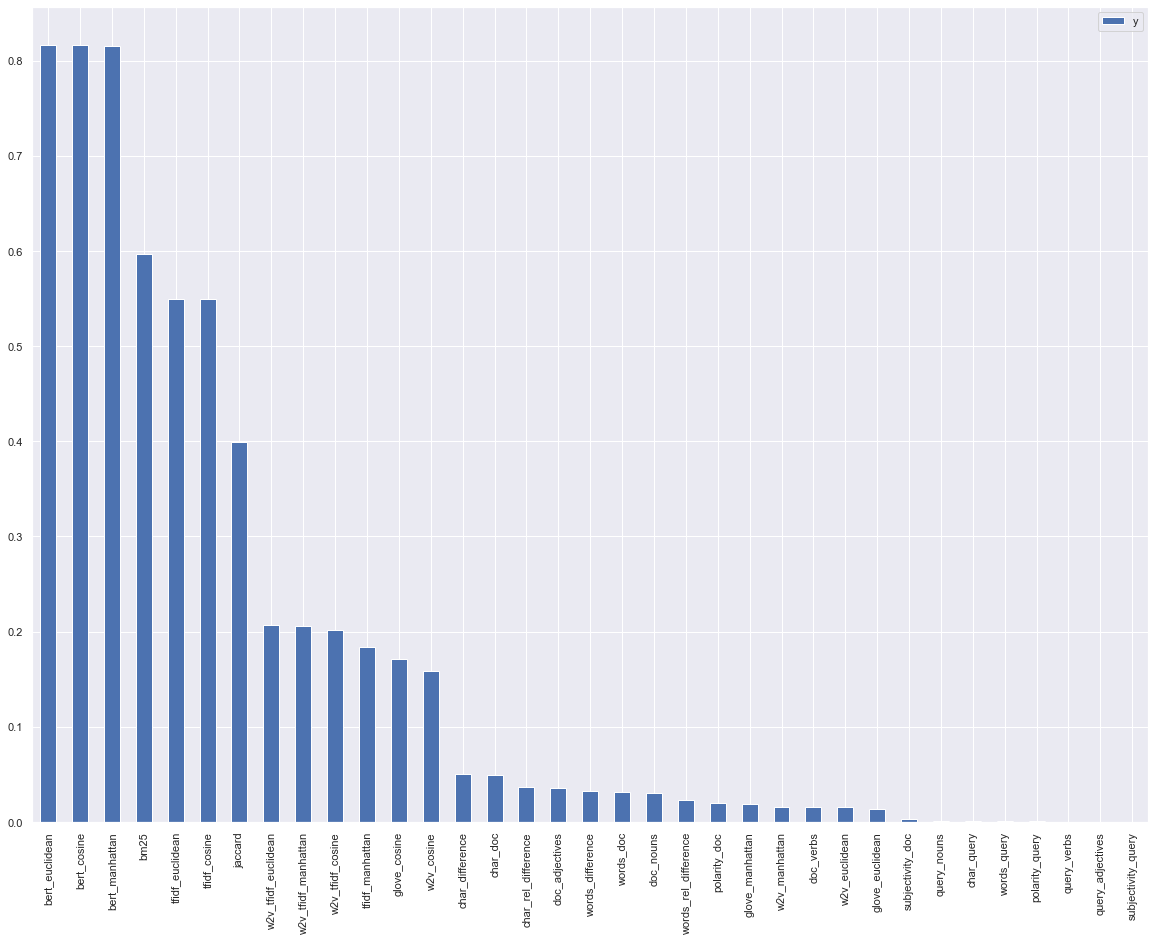

In [9]:
corr_y_2 = abs(pipeline.features.drop(columns=['qID', 'pID']).corr(method="spearman")["y"])
highest_corr2 = pd.DataFrame(corr_y_2)
highest_corr2.drop(['y'], inplace=True)
highest_corr2.sort_values('y',  ascending=False, inplace=True)
highest_corr2.plot(kind='bar')

### Forward Selection

In [5]:
features, performances = pipeline.forward_selection('lr', 0, name='select_lr')

Testing features: ['w2v_cosine']
Testing features: ['w2v_euclidean']
Testing features: ['w2v_manhattan']
Testing features: ['w2v_tfidf_cosine']
Testing features: ['w2v_tfidf_euclidean']
Testing features: ['w2v_tfidf_manhattan']
Testing features: ['tfidf_cosine']
Testing features: ['tfidf_euclidean']
Testing features: ['tfidf_manhattan']
Testing features: ['bert_cosine']
Testing features: ['bert_euclidean']
Testing features: ['bert_manhattan']
Testing features: ['glove_cosine']
Testing features: ['glove_euclidean']
Testing features: ['glove_manhattan']
Testing features: ['jaccard']
Testing features: ['words_doc']
Testing features: ['words_query']
Testing features: ['words_difference']
Testing features: ['words_rel_difference']
Testing features: ['char_doc']
Testing features: ['char_query']
Testing features: ['char_difference']
Testing features: ['char_rel_difference']
Testing features: ['subjectivity_doc']
Testing features: ['polarity_doc']
Testing features: ['subjectivity_query']
Testi

Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_tfidf_cosine']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_tfidf_euclidean']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_tfidf_manhattan']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'tfidf_cosine']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'tfidf_euclidean']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'tfidf_manhattan']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'bert_manhattan']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'glove_cosine']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'glove_euclidean']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean

Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'words_doc']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'words_query']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'words_difference']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'words_rel_difference']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'char_doc']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'char_query']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'char_difference']
Testing features: ['bert_cosine', 'bm25', '

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'glove_euclidean']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'glove_manhattan']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'jaccard']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'words_doc']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'words_query']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'words_diff

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'char_doc']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'char_query']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'char_difference']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'subjectivity_doc']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'subjectivity_query']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclide

/Users/tim/opt/anaconda3/envs/inforetrieval/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'doc_nouns', 'tfidf_euclidean']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'doc_nouns', 'tfidf_manhattan']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'doc_nouns', 'bert_manhattan']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'doc_nouns', 'glove_euclidean']
Testing features: ['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'doc_nouns', 'glove_manhattan']
Testin

##### Plots

In [6]:
import matplotlib.pyplot as plt

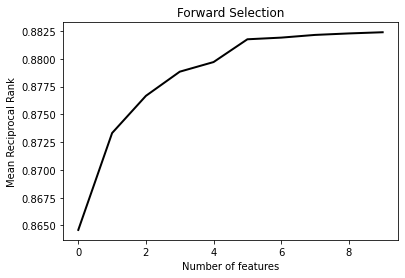

['bert_cosine', 'bm25', 'char_rel_difference', 'bert_euclidean', 'w2v_cosine', 'w2v_tfidf_euclidean', 'polarity_doc', 'glove_cosine', 'query_verbs', 'doc_nouns']


In [7]:
plt.plot(performances, linewidth=2.0, color='black')
plt.title('Forward Selection')
plt.ylabel('Mean Reciprocal Rank')
plt.xlabel('Number of features')
plt.show()
print(features)

### Results

In [8]:
import pandas as pd
from src.utils.utils import load

results = load('data/results/results.pkl')
results[results['name'] == 'select_lr']

,name,model,hyperparameters,pairwise_model,pairwise_k,features,sampling_training,sampling_test,pca,MRR,MAP,nDCG,accuracy,precision,recall,f1,accuracy@50,precision@50,recall@50,f1@50
0,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_cosine""]",9977,451680,0,0.266136,0.213607,0.466847,0.880017,0.020470,0.633635,0.039658,0.243333,0.243333,1.000000,0.391421
1,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_euclidean""]",9977,451680,0,0.017782,0.012244,0.245864,0.728835,0.004897,0.338052,0.009654,0.018667,0.018667,1.000000,0.036649
2,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_manhattan""]",9977,451680,0,0.034391,0.011349,0.245556,0.742402,0.004917,0.322197,0.009686,0.016667,0.016667,1.000000,0.032787
3,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_tfidf_cosine""]",9977,451680,0,0.348512,0.454008,0.605277,0.980648,0.126086,0.665912,0.212026,0.433333,0.433333,1.000000,0.604651
4,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""w2v_tfidf_euclidean""]",9977,451680,0,0.370287,0.427975,0.594469,0.960346,0.022986,0.220272,0.041629,0.358667,0.311060,0.425868,0.359521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bert_cosine"", ""bm25"", ""char_rel_difference"",...",9977,451680,0,0.818750,0.879195,0.882335,0.997250,0.998099,0.297282,0.458115,0.725333,0.997996,0.547855,0.707386
326,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bert_cosine"", ""bm25"", ""char_rel_difference"",...",9977,451680,0,0.777963,0.878682,0.876585,0.997252,0.998102,0.297848,0.458788,0.726667,0.998000,0.549559,0.708807
327,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bert_cosine"", ""bm25"", ""char_rel_difference"",...",9977,451680,0,0.788333,0.879195,0.879900,0.997230,0.998066,0.292186,0.452037,0.721333,0.997967,0.540749,0.701429
328,select_lr,LogisticRegression(),"{'C': 1.0, 'class_weight': None, 'dual': False...",None,None,"[""bert_cosine"", ""bm25"", ""char_rel_difference"",...",9977,451680,0,0.790850,0.880401,0.877995,0.997210,0.998031,0.287089,0.445910,0.712667,0.997917,0.526953,0.689705
